In [1]:
import sys

sys.path.append("../mcts_dl")

In [2]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [3]:
from utils.utils import ReadMapFromMovingAIFile, Map

In [5]:
map_name = "Paris_0_256"
taskMap = ReadMapFromMovingAIFile(f"../data/street-map/{map_name}.map")

In [6]:
def get_image_map(gridMap : Map):
    hIm = gridMap.height 
    wIm = gridMap.width
    im = np.zeros((hIm, wIm), dtype=np.uint8)
    for i in range(gridMap.height):
        for j in range(gridMap.width):
            if(gridMap.cells[i][j] == 1):
                im[i][j] = 1
    return np.asarray(im) * 255

In [7]:
image_map = get_image_map(taskMap)

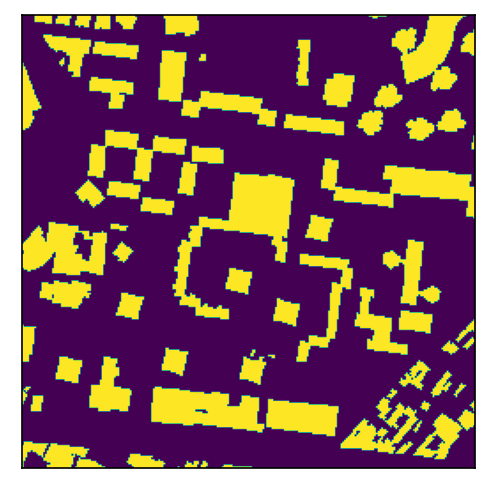

In [8]:
fig, ax = plt.subplots(dpi=150)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(image_map)

In [9]:
image_map

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [10]:
def draw_next_window(image_map, current, offset=10):
    fig, axes = plt.subplots(3, 3, figsize=(20, 12), dpi=150)

    fig.suptitle('Windows')
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            y = current[0] + i 
            x = current[1] + j 
            
            window = image_map[(y-offset):(y+offset+1), (x-offset):(x+offset+1)]
            
            axes[i+1][j+1].imshow(window)
            axes[i+1][j+1].set_title(f"{i, j}\n{y, x}")
            axes[i+1][j+1].axis('off')

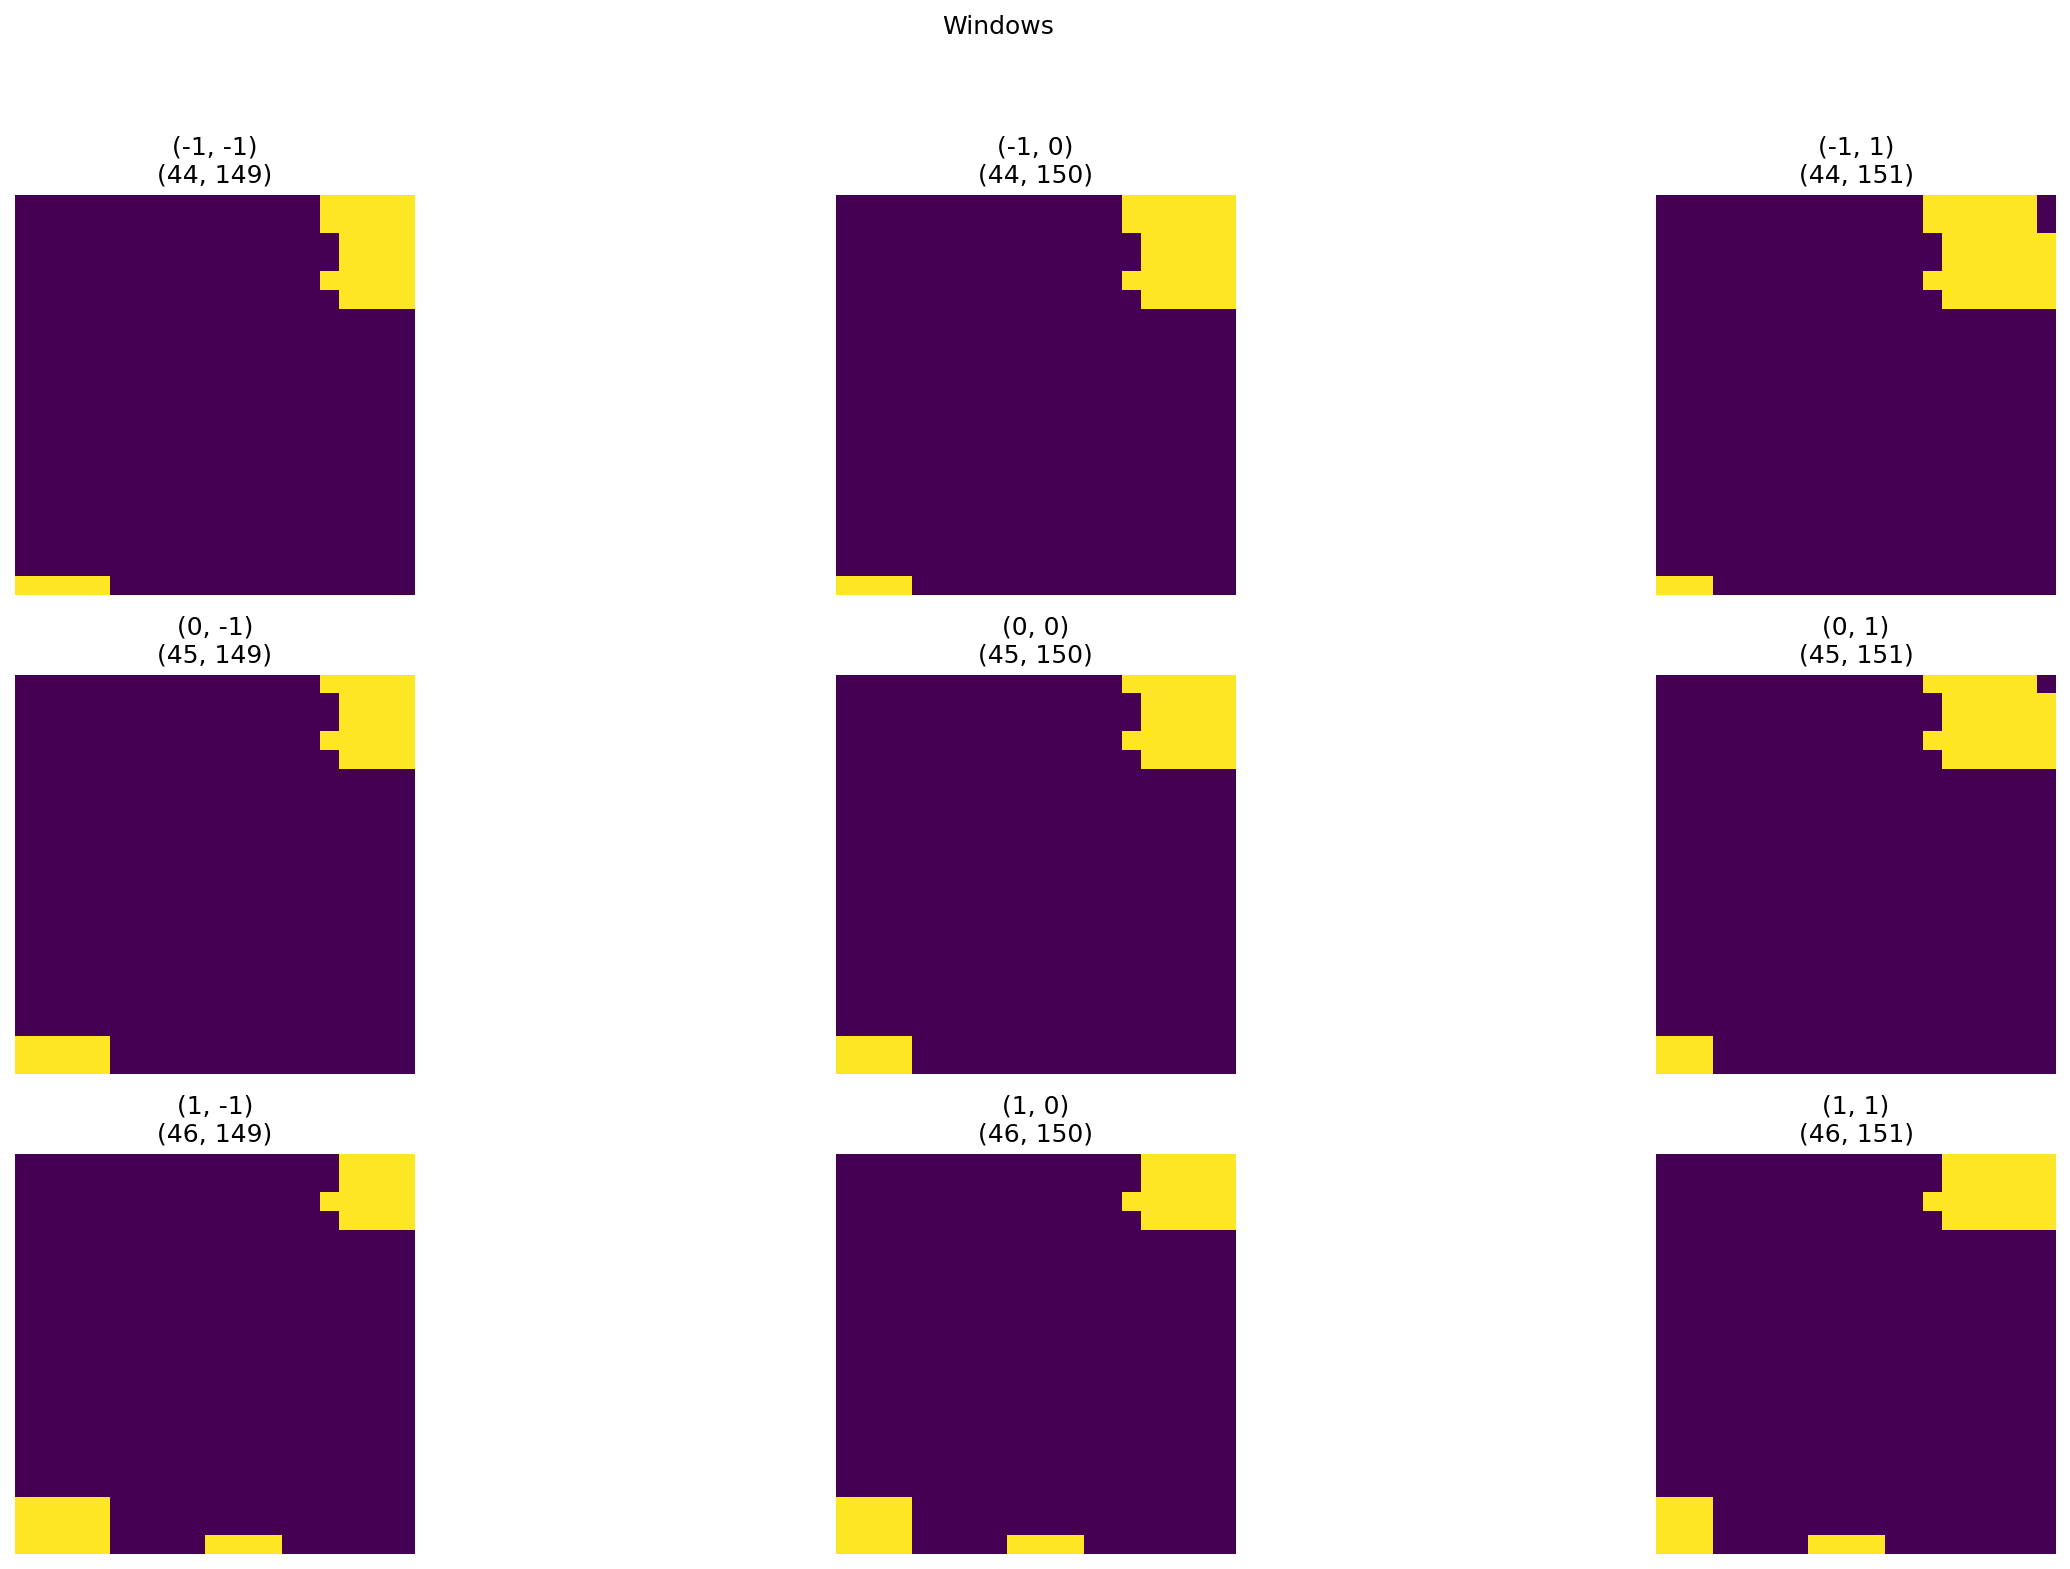

In [11]:
y = 45
x = 150
current = (y, x)

draw_next_window(image_map, current)

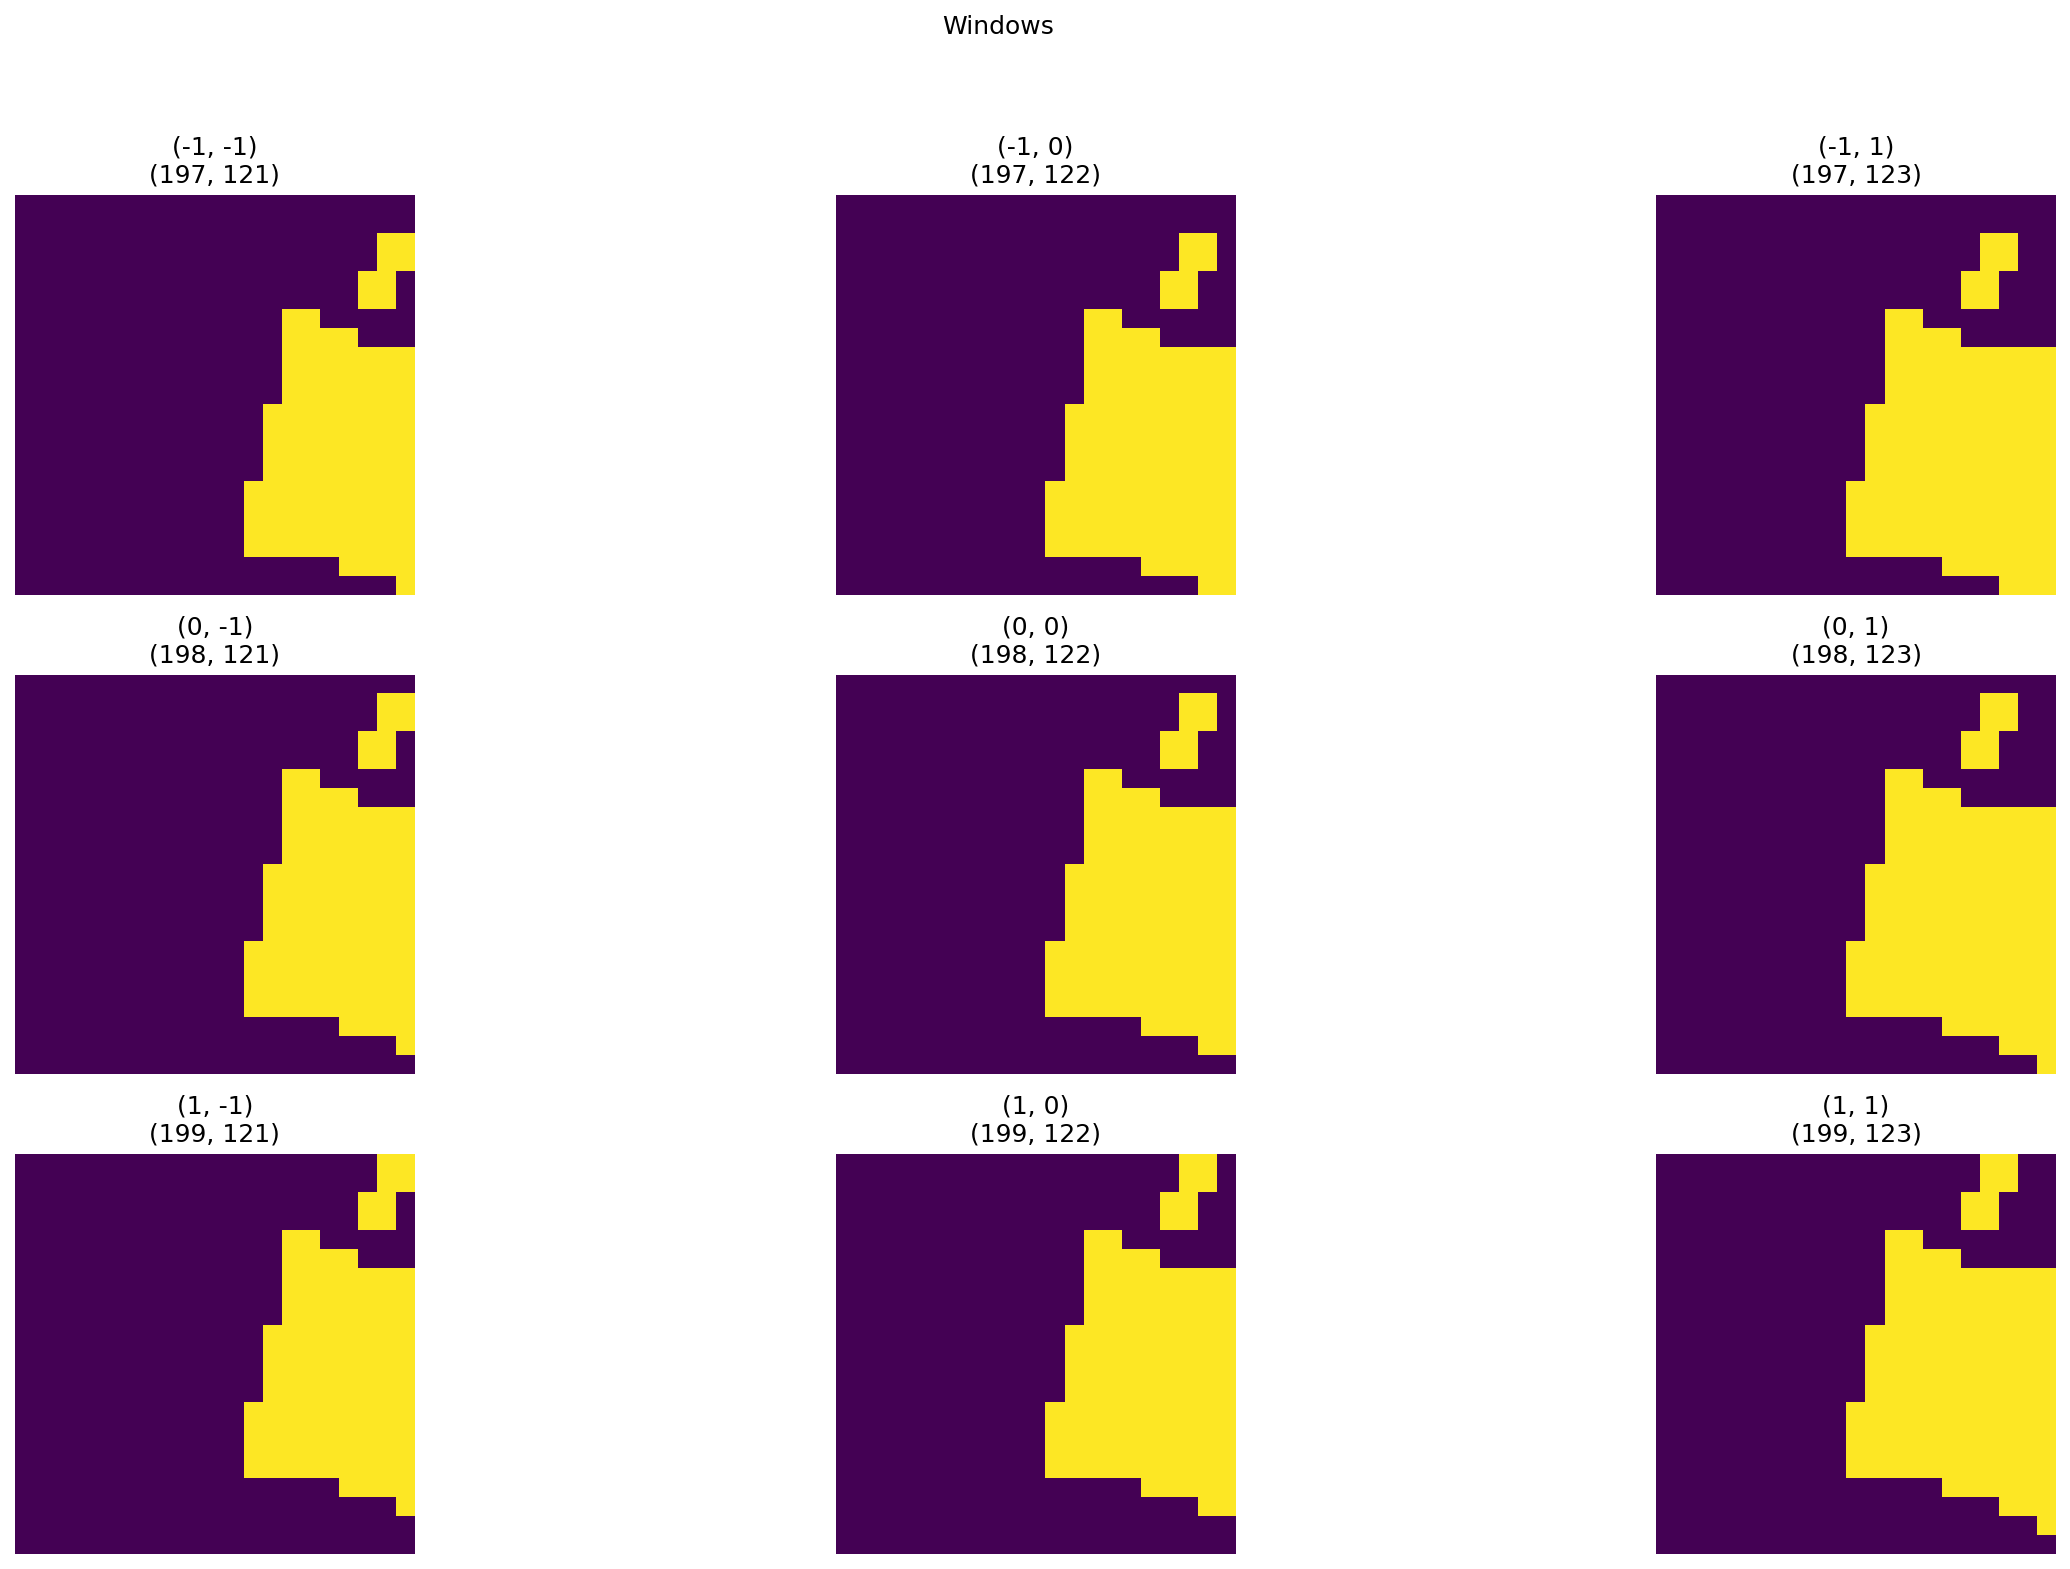

In [12]:
y = np.random.randint(256, size=1)[0]
x = np.random.randint(256, size=1)[0]
current = (y, x)

draw_next_window(image_map, current)

In [23]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])
y0, x0 = (2, 1)
offset = 1

b = a[y0-offset:y0+offset+1, x0-offset:x0+offset+1]

dy, dx = (-1, 1)
y = y0 + dy
x = x0 + dx

c = a[y-offset:y+offset+1, x-offset:x+offset+1]

In [24]:
b

array([[ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [25]:
c

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

In [12]:
map_name = "Berlin_0_256"
taskMap = ReadMapFromMovingAIFile(f"../data/{map_name}.map")

In [13]:
image_map = get_image_map(taskMap)

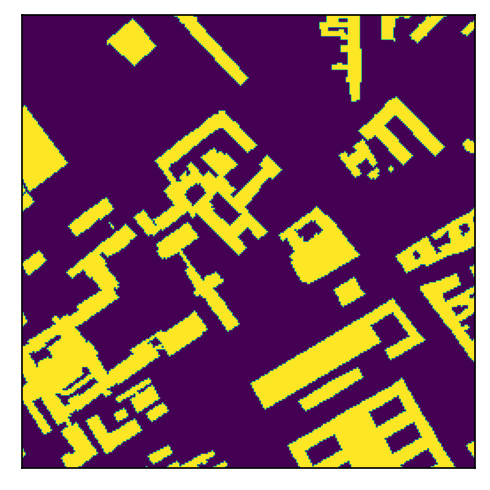

In [14]:
fig, ax = plt.subplots(dpi=150)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(image_map)

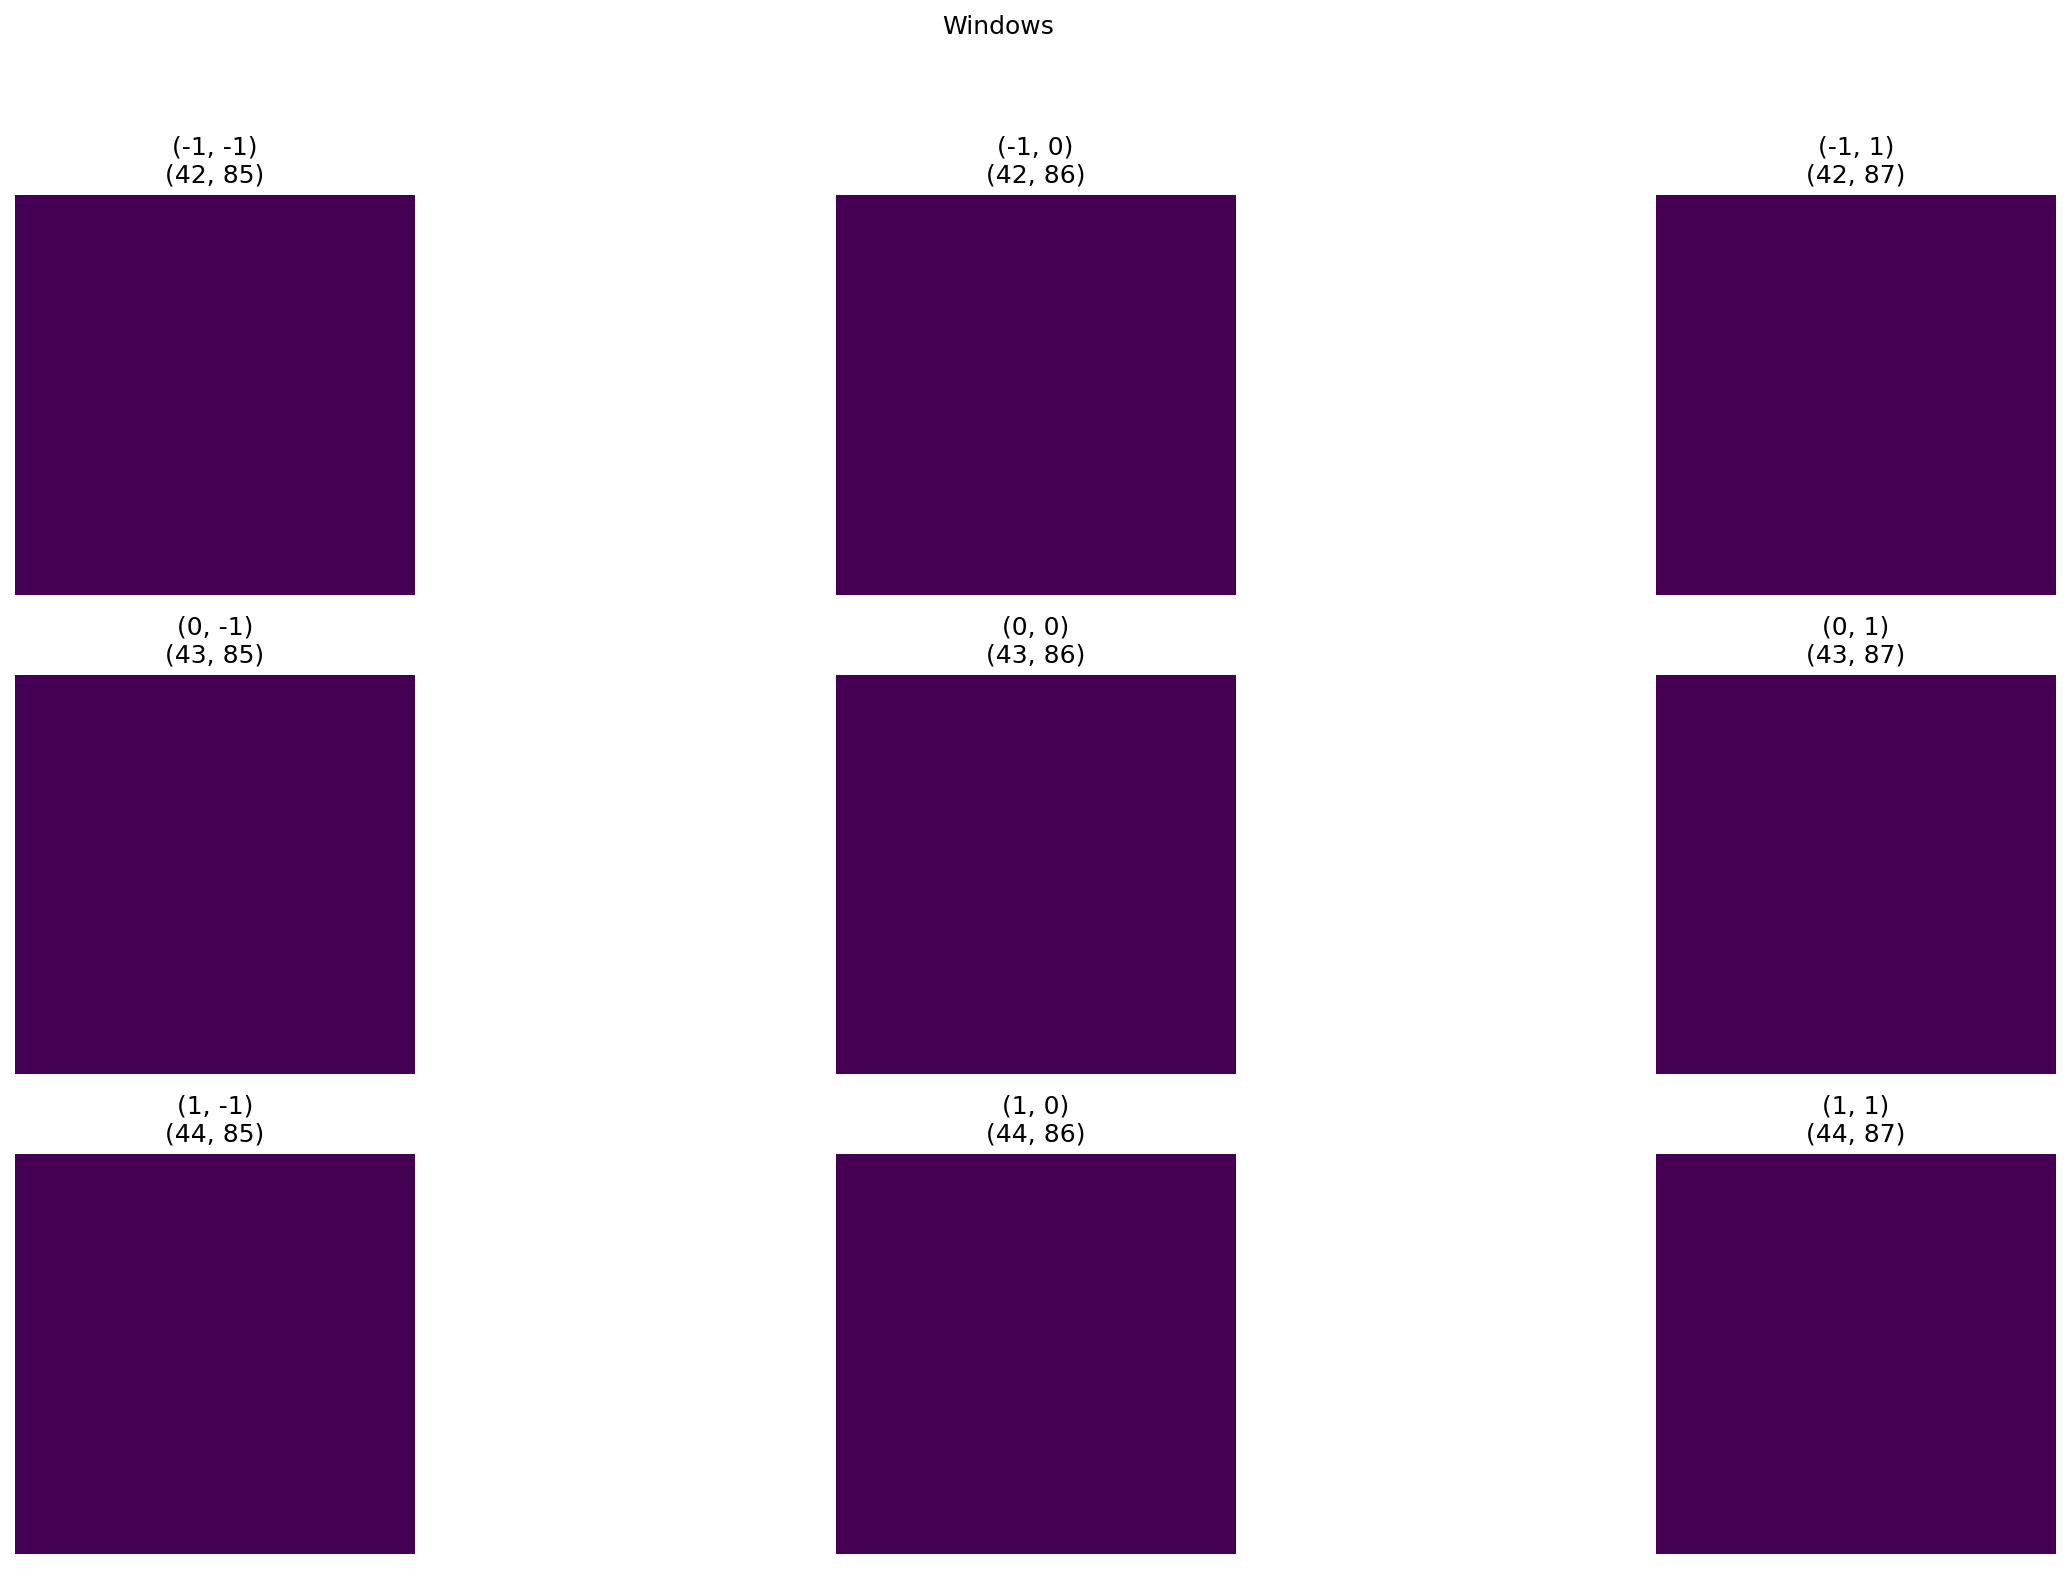

In [15]:
y = np.random.randint(256, size=1)[0]
x = np.random.randint(256, size=1)[0]
current = (y, x)

draw_next_window(image_map, current)

In [16]:
import os
import sys
sys.path.append("../mcts_dl")

from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from utils.utils import ReadMapFromMovingAIFile, Map


def get_image_map(gridMap : Map):
    hIm = gridMap.height 
    wIm = gridMap.width
    im = np.zeros((hIm, wIm), dtype=np.uint8)
    for i in range(gridMap.height):
        for j in range(gridMap.width):
            if(gridMap.cells[i][j] == 1):
                im[i][j] = 1
    return np.asarray(im)


class City(Dataset):
    def __init__(self, map_root):
        map_paths = [os.path.join(map_root, path) 
                     for path in os.listdir(map_root) 
                     if ".map" in path]
        
        task_maps = [ReadMapFromMovingAIFile(map_path) 
                     for map_path in map_paths]
        
        self.image_maps = [get_image_map(task_map) 
                           for task_map in task_maps]
        
    def __len__(self):
        return len(self.image_maps)
    
    def __getitem__(self, idx):
        image_map = self.image_maps[idx]
        
        return ToTensor()(image_map)

In [26]:
city_ds = City(map_root="../data")
city_dl = DataLoader(dataset=city_ds, batch_size=2, shuffle=True)

torch.Size([2, 1, 256, 256])
torch.Size([2, 1, 21, 21])


TypeError: Invalid shape (2, 1, 21, 21) for image data

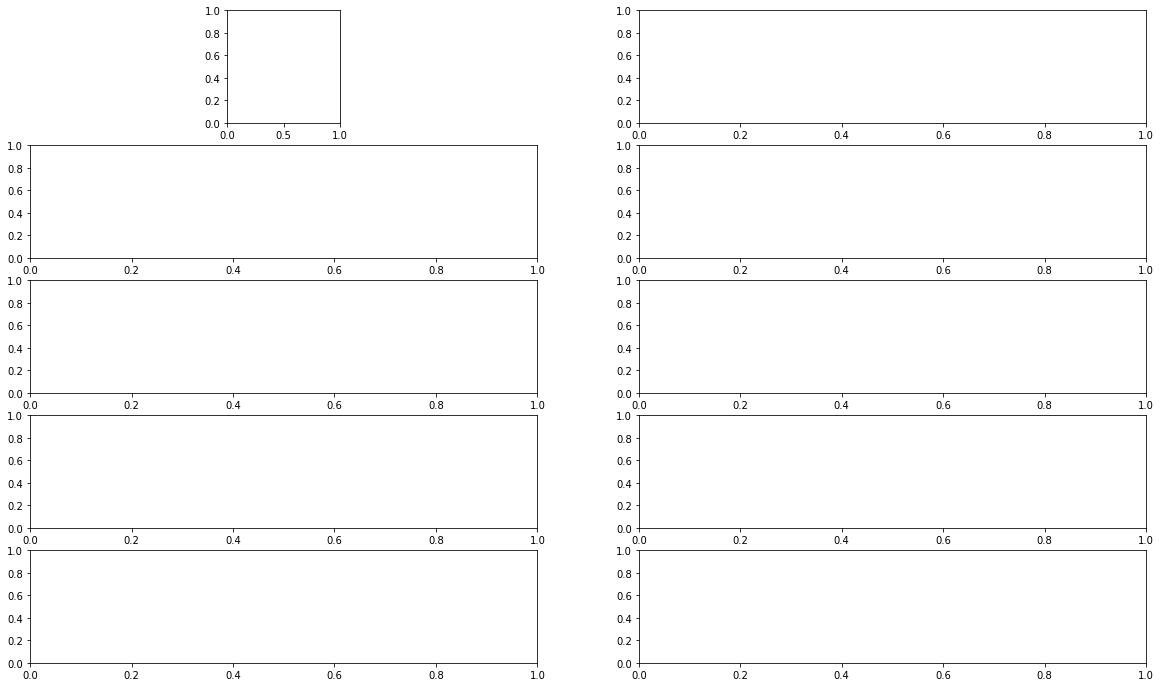

In [28]:
num_steps = 5
fig, axes = plt.subplots(num_steps, 2, figsize=(20, 12))

offset = 10

current = np.random.randint(256, size=(1, 2))[0]
actions = np.random.randint(-1, 2, size=(num_steps, 2))

for image_map in city_dl:
    for i, action in enumerate(actions):
        y, x = current
        print(image_map.shape)
        source_window = image_map[:, :, (y-offset):(y+offset+1), (x-offset):(x+offset+1)]
        
        print(source_window.shape)
        axes[i][0].imshow(source_window)
        axes[i][0].set_title(f"{y, x}")
        axes[i][0].axis('off')
        
        y += action[0]
        x += action[1]
        target_window = image_map[0, 0, (y-offset):(y+offset+1), (x-offset):(x+offset+1)]
        
        
        axes[i][1].imshow(target_window)
        axes[i][1].set_title(f"{action}\n{y, x}")
        axes[i][1].axis('off')
        
        current = (y, x)

In [46]:
h, w = source_window.shape[-2:]

In [47]:
import torch
action_y = torch.full((1, 1, h, w), -1)
action_x = torch.full((1, 1, h, w), 1)


In [36]:
action_y.shape

torch.Size([2, 1, 21, 21])

In [40]:
out = torch.cat((source_window, action_y, action_x), dim=1)
out.shape

torch.Size([2, 3, 21, 21])

In [ ]:
def draw_next_window(image_map, current, offset=10):
    

    fig.suptitle('Windows')
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            y = current[0] + i 
            x = current[1] + j 
            
            window = image_map[(y-offset):(y+offset+1), (x-offset):(x+offset+1)]
            
            axes[i+1][j+1].imshow(window)
            axes[i+1][j+1].set_title(f"{i, j}\n{y, x}")
            axes[i+1][j+1].axis('off')

In [45]:
current = np.random.randint(256, size=(1, 2))
current

array([[ 35, 152]])

In [38]:
a = tuple([0])
a

(-1, -1)

In [31]:
action = [(y, x) for y, x in np.random.randint(-1, 2, size=2)]



TypeError: cannot unpack non-iterable numpy.int64 object

In [26]:
y[:2,1]

array([74, 71])

In [ ]:
    def get_windows(self, idx, current, action):
        image_map = self.image_maps[idx]
        

        return source_window, target_window

In [45]:
city = City(map_root="../data", offset=10)

In [46]:
y = np.random.randint(256, size=4)[0]
x = np.random.randint(256, size=4)[0]
current = (y, x)
action = (-1, -1)

In [47]:
source_window, target_window = city.get_windows(0, current, action)

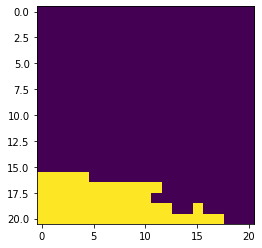

In [48]:
plt.imshow(source_window)

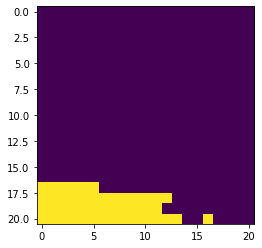

In [49]:
plt.imshow(target_window)